In [ ]:
!pip install opencv-contrib-python
!pip install numpy
!pip install matplotlib

In [58]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from os import listdir

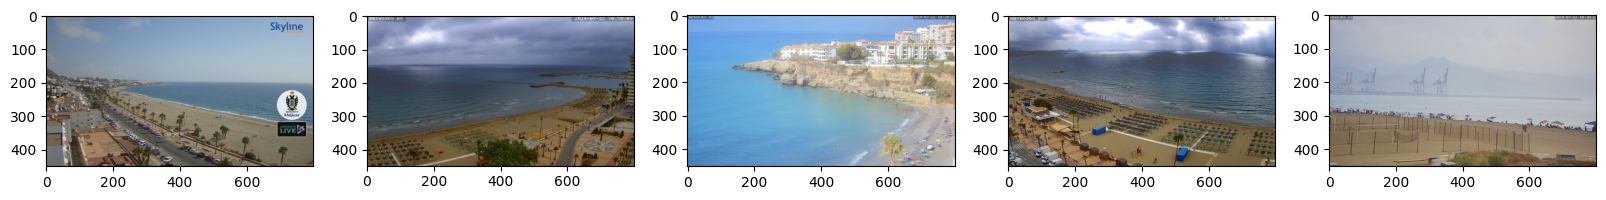

In [59]:
# list images ins media folder
cv_images = []
for img in listdir('media'):
    cv_img = cv.imread('media/'+img)
    cv_images.append(cv_img)

fig, ax = plt.subplots(1, len(cv_images), figsize=(20, 20))
for i in range(len(cv_images)):
    cv_images[i] = cv.cvtColor(cv_images[i], cv.COLOR_BGR2RGB)
    ax[i].imshow(cv_images[i])
plt.show()


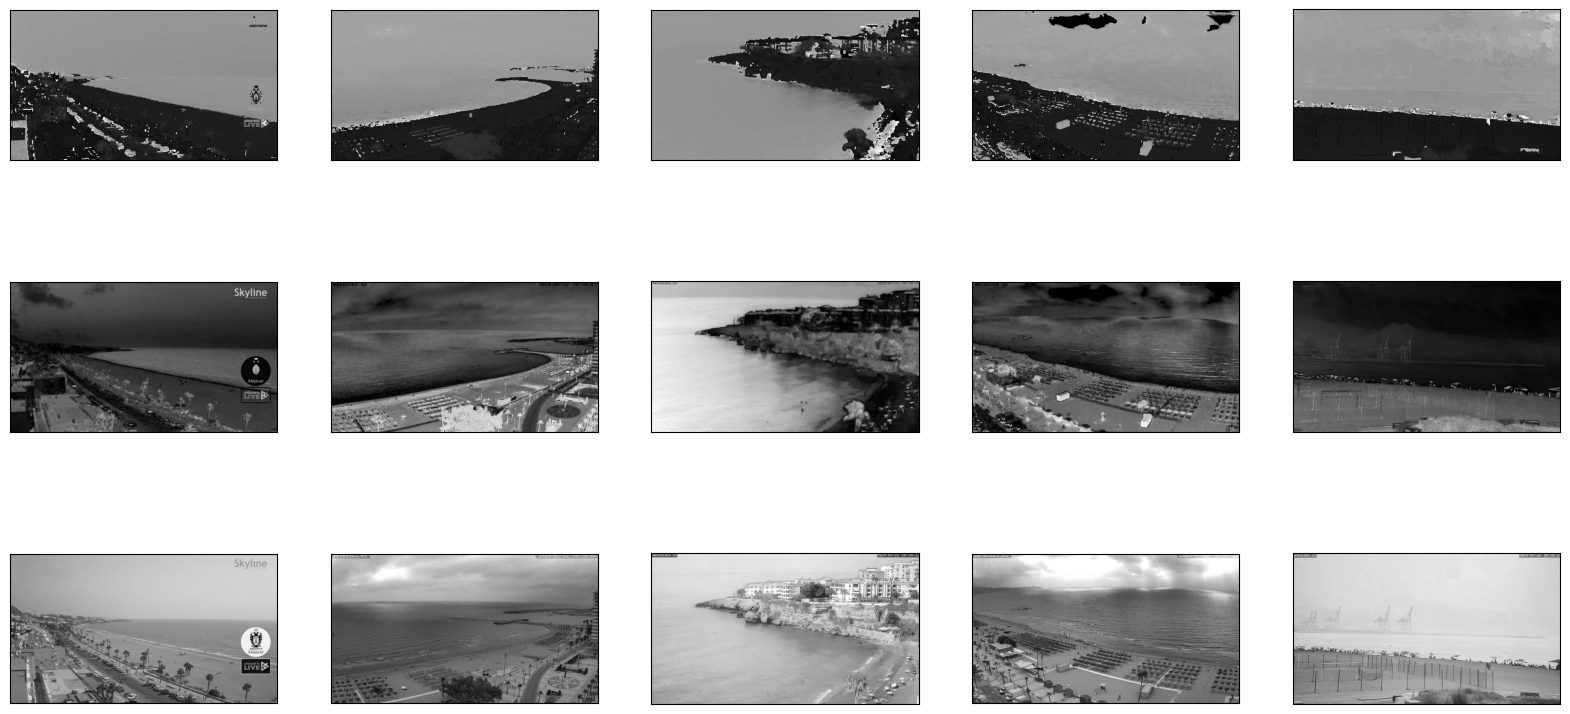

In [60]:

# display h, s, v channels
fig, ax = plt.subplots(3, len(cv_images), figsize=(20, 10))
for i in range(len(cv_images)):
    h, s, v = cv.split(cv.cvtColor(cv_images[i], cv.COLOR_RGB2HSV))
    ax[0, i].imshow(h, cmap='gray')
    ax[1, i].imshow(s, cmap='gray')
    ax[2, i].imshow(v, cmap='gray')
    # axis off
    plt.setp(ax, xticks=[], yticks=[])


# threshold over hue (FAIL)

0 179
0 179
0 179
0 179
0 179
0 179
0 179
0 179
0 179
0 179
0 179
0 179
0 179
0 179
0 179
0 179
0 179
0 179
0 179
0 179
0 179
0 179
0 179
0 179
0 179


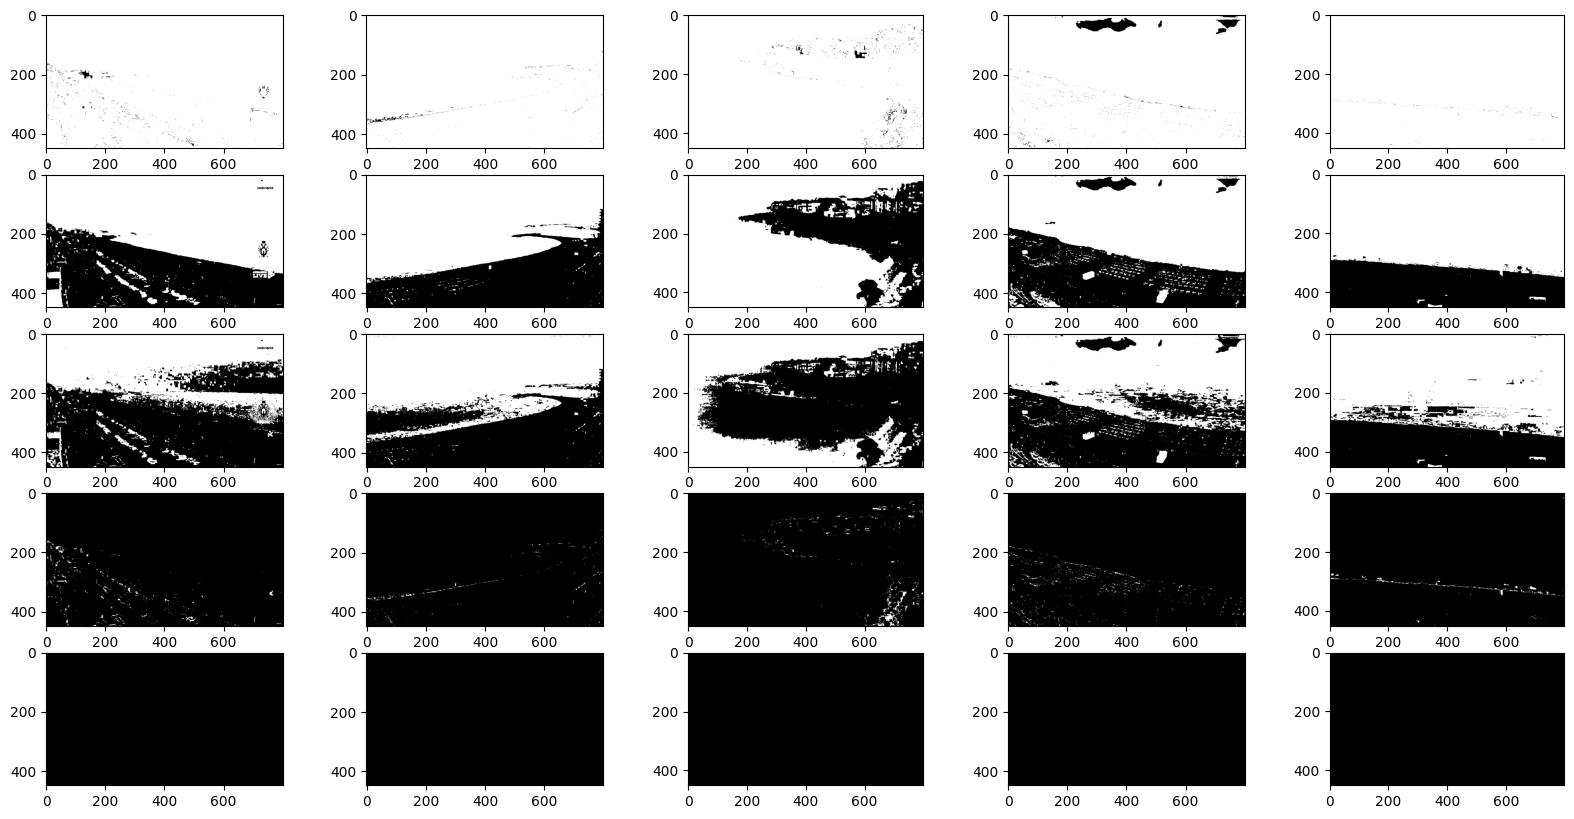

In [72]:
# now lets's try thresholding over the hue images
# This doesn't work because cv.threshold is only a single threshold and i want a range
fig , ax= plt.subplots(5, len(cv_images), figsize=(20, 10))
for i in range(len(cv_images)):
    h, s, v = cv.split(cv.cvtColor(cv_images[i], cv.COLOR_RGB2HSV))
    # we want 5 ranges
    for j in range(5):
        # calculate the range
        r = 255//5 * j
        _, h_thresh = cv.threshold(h, r  , 255, cv.THRESH_BINARY)
        ax[j, i].imshow(h_thresh, cmap='gray') 

# cv.inRange
note that hue goes from 0 to 180 in opencv so they can represent the full 360 range in an 8 bit integer

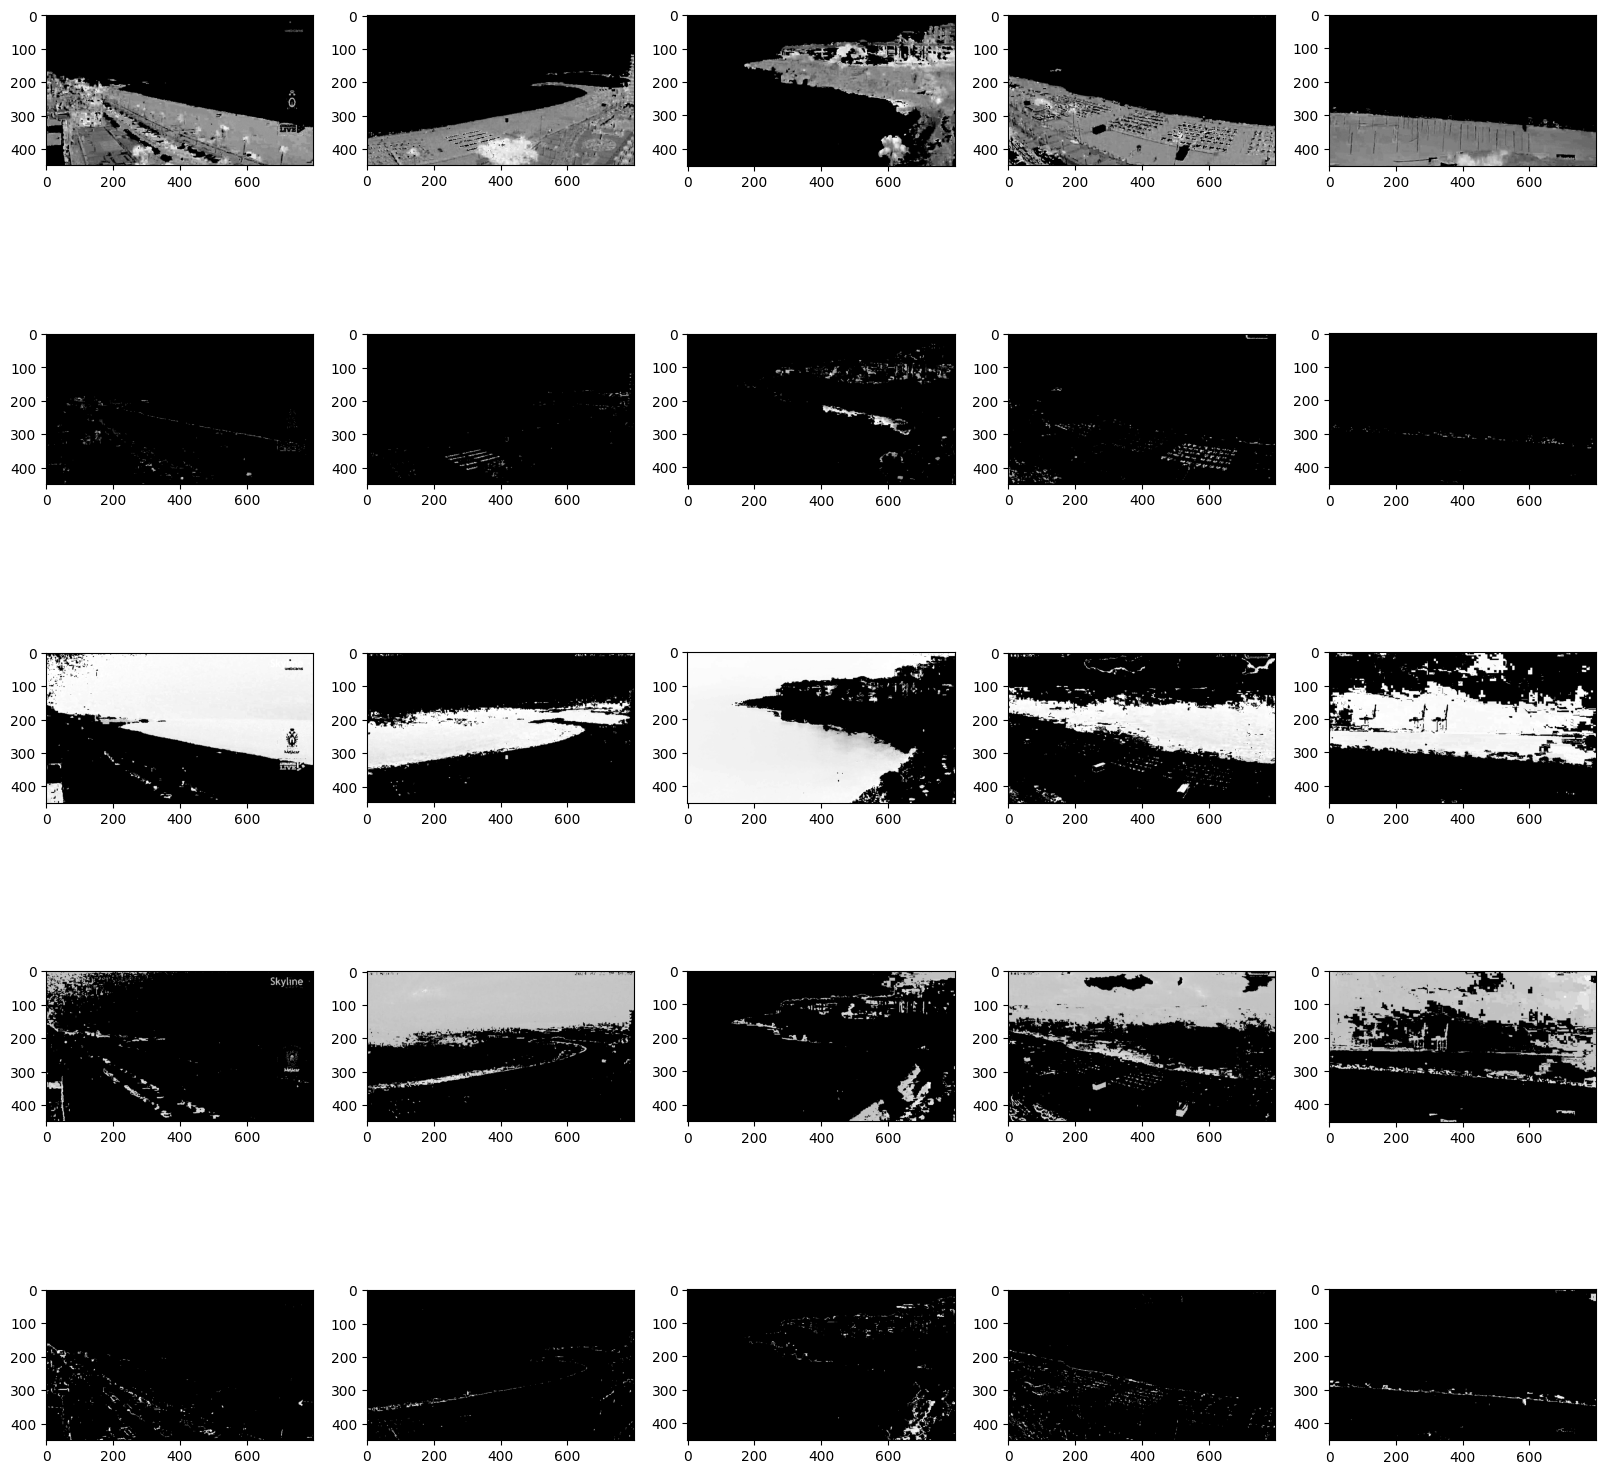

In [82]:
fig, ax = plt.subplots(5, len(cv_images), figsize=(20, 20))
for i, img in enumerate(cv_images):
    h, s, v = cv.split(cv.cvtColor(img, cv.COLOR_RGB2HSV))
    for j in range(5):
        h_range = 180//5 * j 
        mask = cv.inRange(h, h_range, h_range+180//5)
        masked = cv.bitwise_and(h, h, mask=mask)
        ax[j, i].imshow(masked, cmap='gray')
